<html> <h1 style="font-style:italic; color:blue;"> Neural Computing and Deep Learning </h1> </html>

<html> <h1 style="font-style:italic; color:blue;"> Week-7 </h1> </html>


<html> <h2 style="font-style:italic; color:blue;"> Transfer Learning </h2> </html>



<html> <h3 style="font-style:italic; color:blue;"> CIFAR10 Transfer Learning based Classifier </h3> </html>


<html> <h3 style="font-style:italic; color:blue;"> VGG16 and VGG19</h3> </html>


##### This notebook outlines the steps to build a classifier to leverage concepts of Transfer Learning by utilising a pretrained Deep-CNNs.


<html> <h4 style="font-style:italic; color:blue;"> Just run the next 3 cells using 'Ctrl' + 'Enter' </h4> </html>

In [ ]:
# For Google Colab only!

!cat /proc/driver/nvidia/gpus/0000:00:04.0/information

Model: 		 Unknown
IRQ:   		 11
GPU UUID: 	 GPU-f011e5c8-876e-b700-fce2-b35f00193244
Video BIOS: 	 90.04.a7.00.01
Bus Type: 	 PCI
DMA Size: 	 47 bits
DMA Mask: 	 0x7fffffffffff
Bus Location: 	 0000:00:04.0
Device Minor: 	 0
GPU Excluded:	 No


In [ ]:
!pip install np_utils  # - need to run only one time

In [ ]:
pip install scipy==1.11.4    # - need to run only one time


### Restart the Kernel

_________________________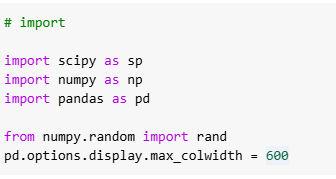

In [ ]:
import scipy as sp
import numpy as np
import pandas as pd
from numpy.random import rand
pd.options.display.max_colwidth = 600

In [ ]:
from sklearn import preprocessing
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from sklearn.model_selection import train_test_split

___________________________________________________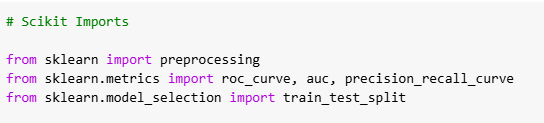

_________________________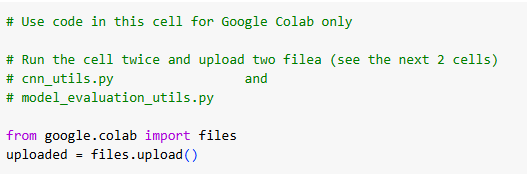

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cnn_utils.py to cnn_utils (1).py
Saving model_evaluation_utils.py to model_evaluation_utils (1).py


In [ ]:
#

________________________________________________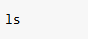

In [ ]:
ls

'cnn_utils (1).py'  'model_evaluation_utils (1).py'   sample_data/
 cnn_utils.py        model_evaluation_utils.py


In [ ]:
#

As a result, the previous cell should show 2 files uploaded to Colab.

##### Downloading the personal libraries

Source the library here:

https://github.com/JudasDie/deeplearning.ai/blob/master/Convolutional%20Neural%20Networks/week1/cnn_utils.py

________________________________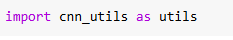

In [ ]:
import cnn_utils as utils

In [ ]:
#

____________________________________________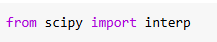

In [ ]:
from scipy import interp

In [ ]:
#

##### Downloading the personal libraries

Source the library here:
https://github.com/dipanjanS/hands-on-transfer-learning-with-python/blob/master/notebooks/Ch06%20-%20Image%20Recognition%20and%20Classification/model_evaluation_utils.py


___________________________________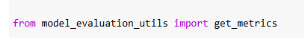

In [ ]:
from model_evaluation_utils import get_metrics

In [ ]:
#

<html> <h4 style="font-style:italic; color:blue;"> Just run the next cell using 'Ctrl' + 'Enter' </h4> </html>

In [ ]:
# Matplot Imports

import matplotlib.pyplot as plt
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}

plt.rcParams.update(params)
%matplotlib inline

______________________________________________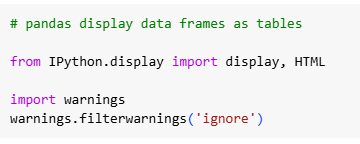

In [ ]:
from IPython.display import display, HTML
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#

<html> <h4 style="font-style:italic; color:blue;"> Just run the next cell using 'Ctrl' + 'Enter' </h4> </html>

In [ ]:
import tensorflow as tf
from tensorflow import keras

from keras import callbacks
from keras import optimizers
from keras.datasets import cifar10

from keras import Model

from keras.applications import vgg16 as vgg
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator



________________________________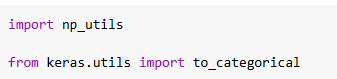

In [ ]:
import np_utils
from keras.utils import to_categorical

In [ ]:
#

### Load and manipulate the DataSet

<html> <h4 style="font-style:italic; color:blue;"> Just run the next cell using 'Ctrl' + 'Enter' </h4> </html>

In [ ]:
BATCH_SIZE = 32
EPOCHS = 40
NUM_CLASSES = 10
LEARNING_RATE = 1e-4
MOMENTUM = 0.9

__________________________________________________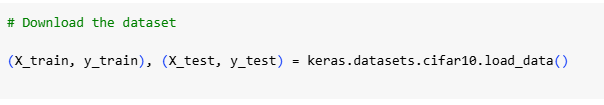

In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
#

__________________________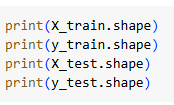

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [ ]:
#

______________________________________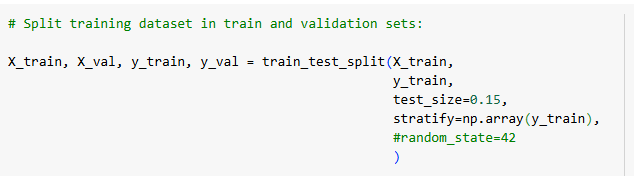

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, stratify=np.array(y_train),random_state=42)

In [ ]:
#

______________________________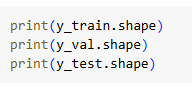

In [ ]:
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(42500, 1)
(7500, 1)
(10000, 1)


In [ ]:
#

Checks for free memory:

_____________________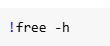

In [ ]:
!free -h

               total        used        free      shared  buff/cache   available
Mem:            12Gi       1.8Gi       4.5Gi       4.0Mi       6.4Gi        10Gi
Swap:             0B          0B          0B


In [ ]:
#

______________________________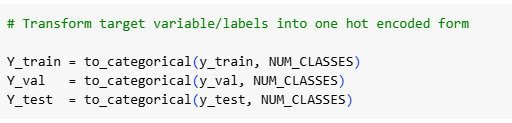

In [ ]:
Y_train=to_categorical (y_train, NUM_CLASSES)
Y_val =to_categorical(y_val, NUM_CLASSES)
Y_test=to_categorical(y_test, NUM_CLASSES)


In [ ]:
#

____________________________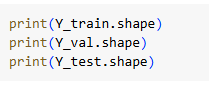

In [ ]:
print(Y_train.shape)
print(Y_val.shape)
print(Y_test.shape)

(42500, 10)
(7500, 10)
(10000, 10)


In [ ]:
 #

### Preprocessing

In [ ]:
# Since we are about to use VGG16 and VGG19as a feature extractor, the minimum size of an image its take is 48x48.
# We utilize ```scipy`` to resize images to required dimensions


_______________________________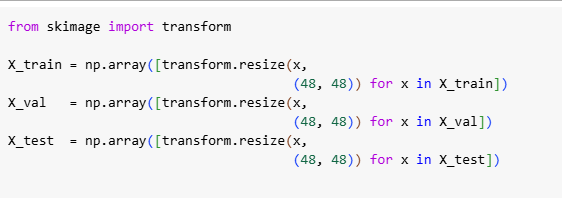

In [ ]:
from skimage import transform
X_train=np.array([transform.resize(x,(48,48)) for x in X_train])
X_val=np.array([transform.resize(x,(48,48)) for x in X_val])
X_test=np.array([transform.resize(x,(48,48)) for x in X_test])

In [ ]:
#

_____________________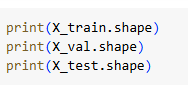

In [ ]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(42500, 48, 48, 3)
(7500, 48, 48, 3)
(10000, 48, 48, 3)


In [ ]:
#

____________________________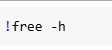

In [ ]:
!free -h

               total        used        free      shared  buff/cache   available
Mem:            12Gi       5.5Gi       740Mi       4.0Mi       6.4Gi       6.8Gi
Swap:             0B          0B          0B


In [ ]:
#

# Create VGG19 Model

- Load VGG16 without the top classification layer
- Create a custom classifier
- Stack both models on top of each other


_______________________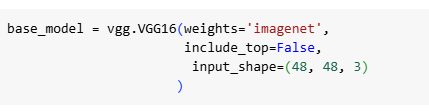

In [ ]:
base_model=vgg.VGG16(weights='imagenet',include_top=False,input_shape=(48,48,3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
#

____________________________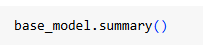

In [ ]:
base_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 48, 48, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 48, 48, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 48, 48, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 24, 24, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 24, 24, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 12, 12, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 3, 3, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 3, 3, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 3, 3, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 3, 3, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 1, 1, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#

________________________________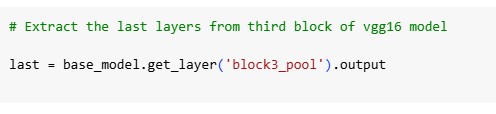

In [ ]:
last=base_model.get_layer('block3_pool').output

In [ ]:
#

______________________________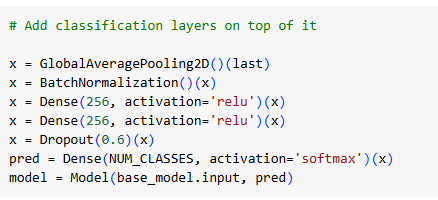

In [ ]:
x=GlobalAveragePooling2D()(last)
x=BatchNormalization()(x)
x=Dense(256,activation='relu')(x)
x=Dense(256,activation='relu')(x)
x=Dropout(0.6)(x)
pred=Dense(NUM_CLASSES,activation='softmax')(x)
model=Model(base_model.input,pred)



In [ ]:
#

____________________________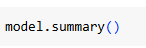

In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 48, 48, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 48, 48, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 48, 48, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 24, 24, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 24, 24, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 12, 12, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 256)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,870,666 (7.14 MB)

 Trainable params: 1,870,154 (7.13 MB)

 Non-trainable params: 512 (2.00 KB)

In [ ]:
#

_____________________________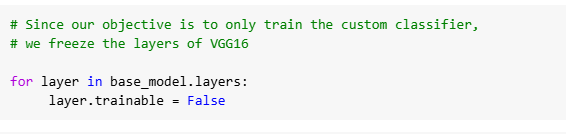

In [ ]:
for layer in base_model.layers:
  layer.trainable= False

In [ ]:
#

_________________________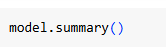

In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 48, 48, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 48, 48, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 48, 48, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 24, 24, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 24, 24, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 12, 12, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 256)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,870,666 (7.14 MB)

 Trainable params: 134,666 (526.04 KB)

 Non-trainable params: 1,736,000 (6.62 MB)

In [ ]:
#

_______________________________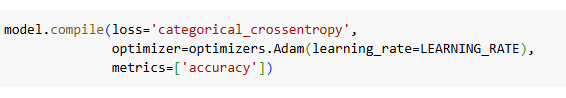

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer=optimizers.Adam (learning_rate=LEARNING_RATE),metrics=['accuracy'])



In [ ]:
#

### Data Augmentation


To help model generalize and overcome the limitations of a small dataset, we prepare augmented datasets using keras  utilities


<html> <h4 style="font-style:italic; color:blue;"> Just run the next 4 cells using 'Ctrl' + 'Enter' </h4> </html>

In [ ]:
# create data augmentation configuration

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    horizontal_flip=False)

In [ ]:
train_datagen.fit(X_train)
train_generator = train_datagen.flow(X_train,
                                     Y_train,
                                     batch_size=BATCH_SIZE)

In [ ]:
val_datagen = ImageDataGenerator(rescale=1. / 255,
                                horizontal_flip=False)

val_datagen.fit(X_val)
val_generator = val_datagen.flow(X_val,
                                 Y_val,
                                 batch_size=BATCH_SIZE)

### Train the Model

In [ ]:
train_steps_per_epoch = X_train.shape[0] // BATCH_SIZE
val_steps_per_epoch = X_val.shape[0] // BATCH_SIZE

________________________________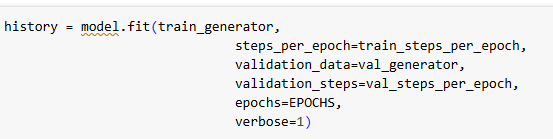

In [ ]:
history =model.fit (train_generator,steps_per_epoch=train_steps_per_epoch,
validation_data=val_generator,
validation_steps=val_steps_per_epoch,
epochs=EPOCHS,
verbose=1)


Epoch 1/40
1328/1328 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.2731 - loss: 2.0153 - val_accuracy: 0.4761 - val_loss: 1.4954
Epoch 2/40
1328/1328 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4688 - loss: 1.4841 - val_accuracy: 0.4761 - val_loss: 1.4953
Epoch 3/40
1328/1328 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - accuracy: 0.4471 - loss: 1.5582 - val_accuracy: 0.5308 - val_loss: 1.3336
Epoch 4/40
1328/1328 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4062 - loss: 2.1391 - val_accuracy: 0.5317 - val_loss: 1.3340
Epoch 5/40
1328/1328 ━━━━━━━━━━━━━━━━━━━━ 30s 9ms/step - accuracy: 0.5021 - loss: 1.4072 - val_accuracy: 0.5586 - val_loss: 1.2569
Epoch 6/40
1328/1328 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5312 - loss: 1.5772 - val_accuracy: 0.5593 - val_loss: 1.2553
Epoch 7/40
1328/1328 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.5276 - loss: 1.3336 - val_accuracy: 0.5728 - val_loss: 1.2048
Epoch 8/40
1328/1328 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5938 - loss: 1.

In [ ]:
#

### Analyse Model Performance

<html> <h4 style="font-style:italic; color:blue;"> Just run the next cell using 'Ctrl' + 'Enter' </h4> </html>

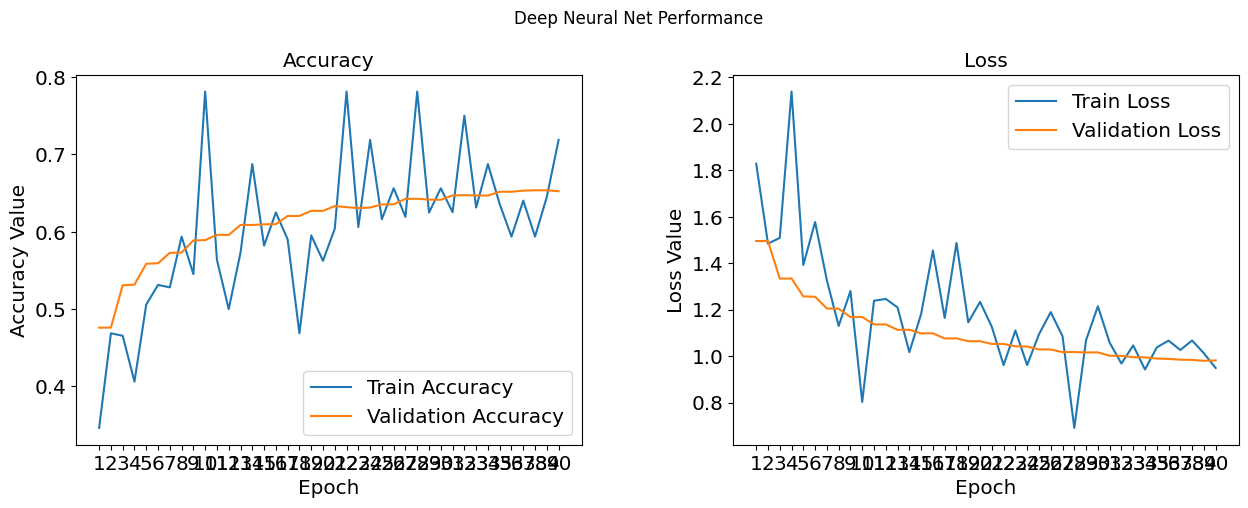

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
t = f.suptitle('Deep Neural Net Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epochs = list(range(1,EPOCHS+1))
ax1.plot(epochs, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epochs, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(epochs)
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epochs, history.history['loss'], label='Train Loss')
ax2.plot(epochs, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(epochs)
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")


___________________________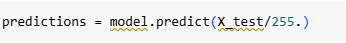

In [ ]:
predictions=model.predict(X_test/255.)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


In [ ]:
#

<html> <h4 style="font-style:italic; color:blue;"> Just run the next cell using 'Ctrl' + 'Enter' </h4> </html>

In [ ]:
test_labels = list(y_test.squeeze())
predictions = list(predictions.argmax(axis=1))

__________________________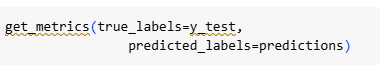

In [ ]:
get_metrics(true_labels=y_test,predicted_labels=predictions)

Accuracy: 0.6575
Precision: 0.6571
Recall: 0.6575
F1 Score: 0.6565


In [ ]:
#

___________________________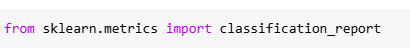

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
#

_______________________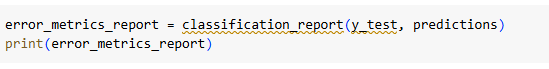

In [ ]:
error_metrics_report = classification_report(y_test, predictions)
print(error_metrics_report)

              precision    recall  f1-score   support

           0       0.69      0.70      0.70      1000
           1       0.75      0.76      0.75      1000
           2       0.58      0.52      0.55      1000
           3       0.46      0.48      0.47      1000
           4       0.62      0.57      0.60      1000
           5       0.56      0.58      0.57      1000
           6       0.70      0.78      0.73      1000
           7       0.72      0.65      0.68      1000
           8       0.77      0.79      0.78      1000
           9       0.71      0.74      0.72      1000

    accuracy                           0.66     10000
   macro avg       0.66      0.66      0.66     10000
weighted avg       0.66      0.66      0.66     10000



In [ ]:
#

_________________________________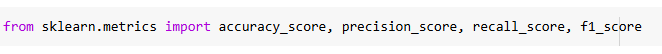

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [ ]:
#

<html> <h4 style="font-style:italic; color:blue;"> Just run the next 6 cells using 'Ctrl' + 'Enter' </h4> </html>

In [ ]:
PretrainedModels = ['VGG-16', 'VGG_19']

In [ ]:
# Create lists for printing final results

ErrorMetrics = []
Accuracy = []
Precision = []
Recall = []
F1_Score = []

In [ ]:
Accuracy.append(accuracy_score(y_test, predictions))
Precision.append(precision_score(y_test, predictions, average = 'macro'))
Recall.append(recall_score(y_test, predictions, average = 'macro'))
F1_Score.append(f1_score(y_test, predictions, average = 'macro'))

print(Accuracy, '\n', Precision, '\n', Recall, '\n', F1_Score)

[0.6575] 
 [0.6570859251421675] 
 [0.6575] 
 [0.6564645358106689]


### Visualise Predictions

In [ ]:
#label_dict = {0:'airplane',
#             1:'automobile',
#             2:'bird',
#             3:'cat',
#             4:'deer',
#             5:'dog',
#             6:'frog',
#             7:'horse',
#             8:'ship',
#             9:'truck'}

classes=['aircraft', 'car', 'bird', 'cat', 'deer',
 'dog', 'frog', 'hours', 'ship', 'truck']

In [ ]:
# Graph this to look at the full set of 10 class predictions.


def plot_image(i,predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(label_dict[predicted_label],
                                    100 * np.max(predictions_array),
                                    label_dict[true_label]),
                                    color=color)

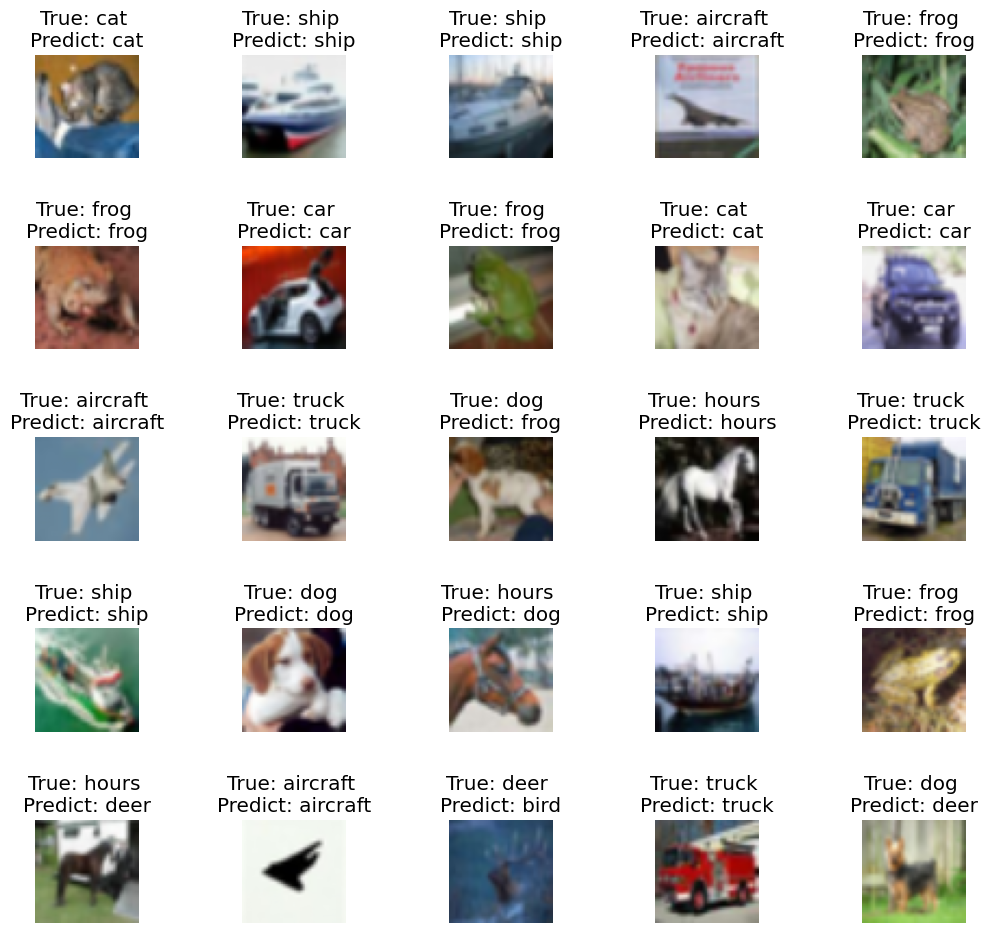

In [ ]:
# Demonstration of the classifier prediction results

R = 5
C = 5
fig, axes = plt.subplots(R, C, figsize=(12,12))
axes = axes.ravel()

for i in np.arange(0, R*C):
    axes[i].imshow(X_test[i])
    axes[i].set_title("True: %s \nPredict: %s" % (classes[np.argmax(Y_test[i])],
                                                  classes[predictions[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)


# Create VGG19 Model

- Load VGG19 without the top classification layer
- Create a custom classifier
- Stack both models on top of each other


_________________________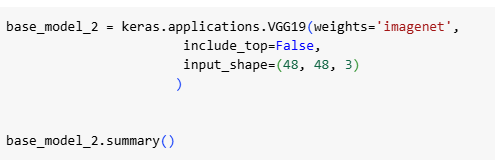

In [ ]:
base_model_2 = keras.applications.VGG19(weights='imagenet',include_top=False,input_shape=(48, 48, 3))


base_model_2.summary()

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "vgg19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 48, 48, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 48, 48, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 48, 48, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 24, 24, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 24, 24, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 12, 12, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 3, 3, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 3, 3, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 3, 3, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 3, 3, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 3, 3, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 20,024,384 (76.39 MB)

 Trainable params: 20,024,384 (76.39 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#

___________________________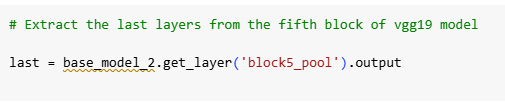

In [ ]:
last= base_model_2.get_layer('block5_pool').output

In [ ]:
#

_______________________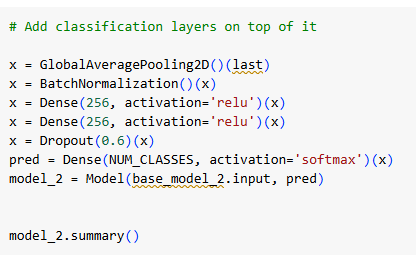

In [ ]:
x = GlobalAveragePooling2D()(last)
x= BatchNormalization()(x)
x= Dense(256, activation='relu')(x)
x= Dense(256, activation='relu')(x)
x = Dropout (0.6) (x)
pred =Dense (NUM_CLASSES, activation='softmax') (x)
model_2 =Model(base_model_2.input, pred)

model_2.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 48, 48, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 48, 48, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 48, 48, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 24, 24, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 24, 24, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 12, 12, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 3, 3, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 3, 3, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 3, 3, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 3, 3, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 3, 3, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 20,226,122 (77.16 MB)

 Trainable params: 20,225,098 (77.15 MB)

 Non-trainable params: 1,024 (4.00 KB)

In [ ]:
#

_________________________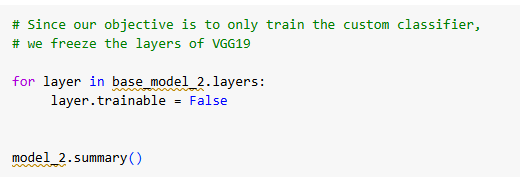

In [ ]:
for layer in base_model_2.layers:
    layer.trainable= False
model_2.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 48, 48, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 48, 48, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 48, 48, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 24, 24, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 24, 24, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 12, 12, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 3, 3, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 3, 3, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 3, 3, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 3, 3, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 3, 3, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 20,226,122 (77.16 MB)

 Trainable params: 200,714 (784.04 KB)

 Non-trainable params: 20,025,408 (76.39 MB)

In [ ]:
#

_______________________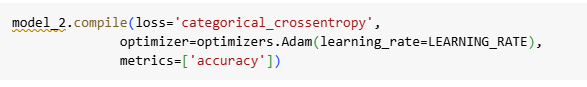

In [ ]:
model_2.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(learning_rate=LEARNING_RATE), metrics=['accuracy'])

In [ ]:
#

### Train the Model_2

______________________________________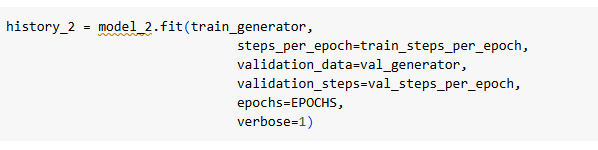

In [ ]:
history_2= model_2.fit(train_generator,steps_per_epoch=train_steps_per_epoch,validation_data=val_generator, validation_steps=val_steps_per_epoch,epochs=EPOCHS,verbose=1)


Epoch 1/40
1328/1328 ━━━━━━━━━━━━━━━━━━━━ 36s 24ms/step - accuracy: 0.2085 - loss: 2.1751 - val_accuracy: 0.3416 - val_loss: 1.8496
Epoch 2/40
1328/1328 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3438 - loss: 1.8177 - val_accuracy: 0.3403 - val_loss: 1.8490
Epoch 3/40
1328/1328 ━━━━━━━━━━━━━━━━━━━━ 28s 21ms/step - accuracy: 0.3102 - loss: 1.8770 - val_accuracy: 0.3775 - val_loss: 1.7472
Epoch 4/40
1328/1328 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.3125 - loss: 1.8322 - val_accuracy: 0.3777 - val_loss: 1.7473
Epoch 5/40
1328/1328 ━━━━━━━━━━━━━━━━━━━━ 41s 31ms/step - accuracy: 0.3399 - loss: 1.7897 - val_accuracy: 0.3900 - val_loss: 1.6991
Epoch 6/40
1328/1328 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3125 - loss: 1.7834 - val_accuracy: 0.3904 - val_loss: 1.6987
Epoch 7/40
1328/1328 ━━━━━━━━━━━━━━━━━━━━ 41s 31ms/step - accuracy: 0.3648 - loss: 1.7432 - val_accuracy: 0.4071 - val_loss: 1.6558
Epoch 8/40
1328/1328 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3125 - loss: 1

In [ ]:
   #

### Analyse Model Performance

<html> <h4 style="font-style:italic; color:blue;"> Just run the next cell using 'Ctrl' + 'Enter' </h4> </html>

Find 4 differences in the code with the similar code for VGG16

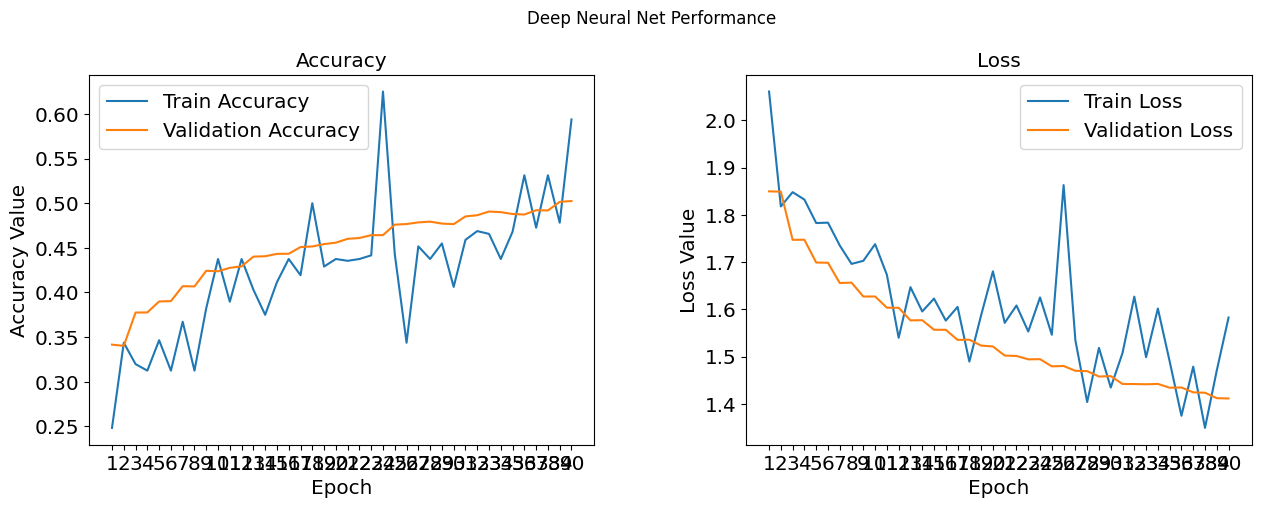

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
t = f.suptitle('Deep Neural Net Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epochs = list(range(1,EPOCHS+1))
ax1.plot(epochs, history_2.history['accuracy'], label='Train Accuracy')
ax1.plot(epochs, history_2.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(epochs)
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epochs, history_2.history['loss'], label='Train Loss')
ax2.plot(epochs, history_2.history['val_loss'], label='Validation Loss')
ax2.set_xticks(epochs)
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")


_______________________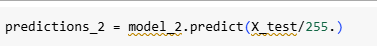

In [ ]:
predictions_2=model_2.predict(X_test/255.)

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step


In [ ]:
#

__________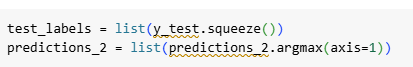

In [ ]:
test_labels=list(y_test.squeeze())
predictions_2=list(predictions_2.argmax(axis=1))

In [ ]:
#

_______________________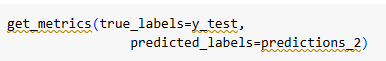

In [ ]:
get_metrics (true_labels=y_test,predicted_labels= predictions_2)


Accuracy: 0.5003
Precision: 0.4939
Recall: 0.5003
F1 Score: 0.4955


In [ ]:
#

_____________________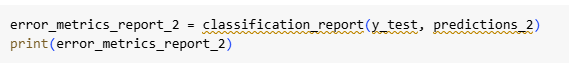

In [ ]:
error_metrics_report_2 =classification_report(y_test, predictions_2)
print(error_metrics_report_2)

              precision    recall  f1-score   support

           0       0.56      0.51      0.53      1000
           1       0.57      0.61      0.59      1000
           2       0.39      0.32      0.35      1000
           3       0.36      0.27      0.31      1000
           4       0.44      0.44      0.44      1000
           5       0.42      0.44      0.43      1000
           6       0.50      0.57      0.54      1000
           7       0.53      0.60      0.56      1000
           8       0.62      0.68      0.65      1000
           9       0.56      0.56      0.56      1000

    accuracy                           0.50     10000
   macro avg       0.49      0.50      0.50     10000
weighted avg       0.49      0.50      0.50     10000



In [ ]:
#

<html> <h4 style="font-style:italic; color:blue;"> Just run the next 2 cells using 'Ctrl' + 'Enter' </h4> </html>

In [ ]:
Accuracy.append(accuracy_score(y_test, predictions_2))
Precision.append(precision_score(y_test, predictions_2, average = 'macro'))
Recall.append(recall_score(y_test, predictions_2, average = 'macro'))
F1_Score.append(f1_score(y_test, predictions_2, average = 'macro'))
print(Accuracy, '\n', Precision, '\n', Recall, '\n', F1_Score)


[0.6575, 0.5003] 
 [0.6570859251421675, 0.493857475242797] 
 [0.6575, 0.5003] 
 [0.6564645358106689, 0.4954511470782485]


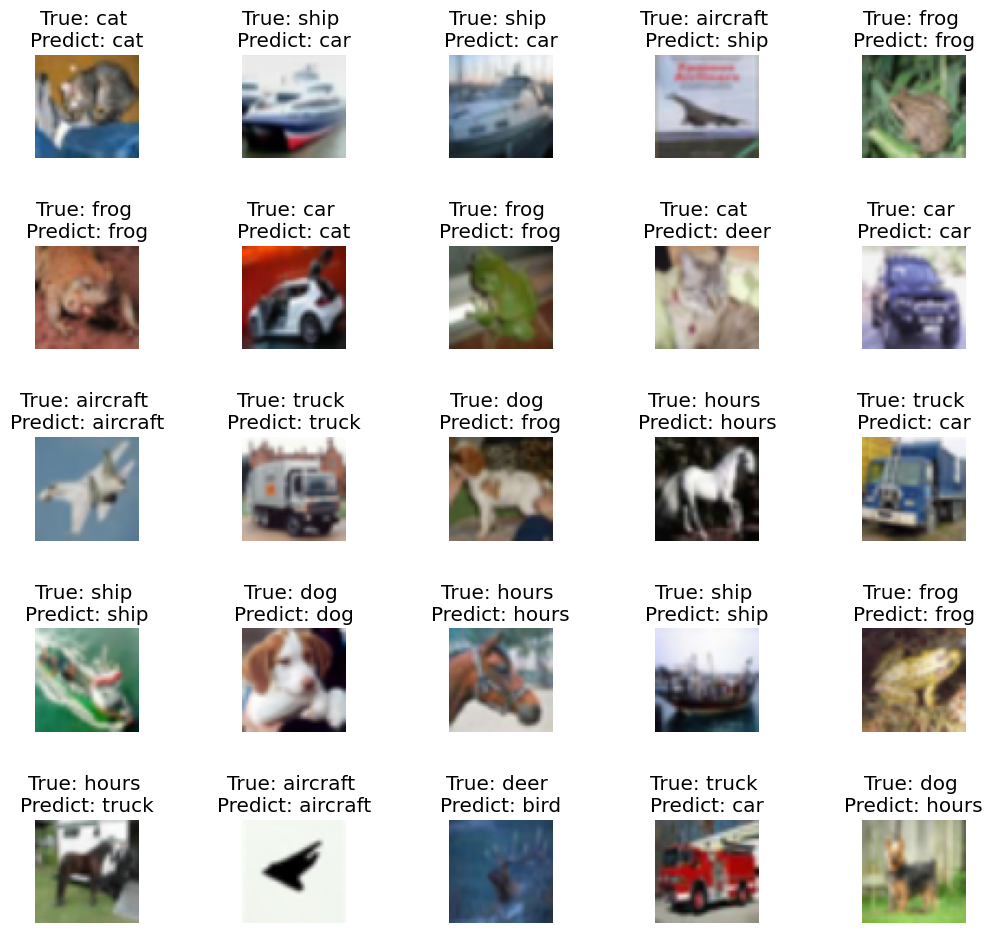

In [ ]:
R = 5
C = 5
fig, axes = plt.subplots(R, C, figsize=(12,12))
axes = axes.ravel()

for i in np.arange(0, R*C):
    axes[i].imshow(X_test[i])
    axes[i].set_title("True: %s \nPredict: %s" % (classes[np.argmax(Y_test[i])],
                                                  classes[predictions_2[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)


<html> <h4 style="font-style:italic; color:blue;"> Just run the next cell using 'Ctrl' + 'Enter' </h4> </html>

In [ ]:
# Run this cell once!

ErrorMetrics.append(Accuracy)
ErrorMetrics.append(Precision)
ErrorMetrics.append(Recall)
ErrorMetrics.append(F1_Score)

________________________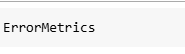

In [ ]:
ErrorMetrics

[[0.6575, 0.5003],
 [0.6570859251421675, 0.493857475242797],
 [0.6575, 0.5003],
 [0.6564645358106689, 0.4954511470782485]]

In [ ]:
#

_________________________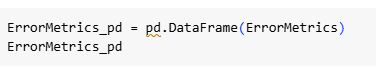

In [ ]:
ErrorMetrics_pd= pd.DataFrame(ErrorMetrics)
ErrorMetrics_pd

,0,1
0,0.657500,0.500300
1,0.657086,0.493857
2,0.657500,0.500300
3,0.656465,0.495451


In [ ]:
#

_____________________________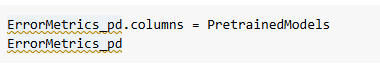

In [ ]:
ErrorMetrics_pd.columns =PretrainedModels
ErrorMetrics_pd

,VGG-16,VGG_19
0,0.657500,0.500300
1,0.657086,0.493857
2,0.657500,0.500300
3,0.656465,0.495451


In [ ]:
#

___________________________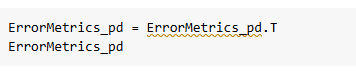

In [ ]:
ErrorMetrics_pd =ErrorMetrics_pd.T
ErrorMetrics_pd

,0,1,2,3
VGG-16,0.6575,0.657086,0.6575,0.656465
VGG_19,0.5003,0.493857,0.5003,0.495451


In [ ]:
#

__________________________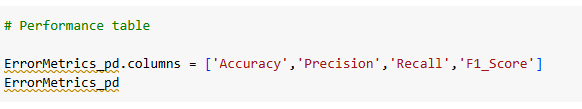

In [ ]:
ErrorMetrics_pd.columns=['Accuracy', 'Precision', 'Recall', 'F1_Score']
ErrorMetrics_pd


,Accuracy,Precision,Recall,F1_Score
VGG-16,0.6575,0.657086,0.6575,0.656465
VGG_19,0.5003,0.493857,0.5003,0.495451


_________________________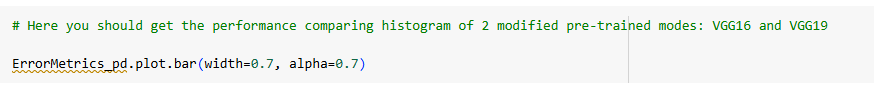

<Axes: >

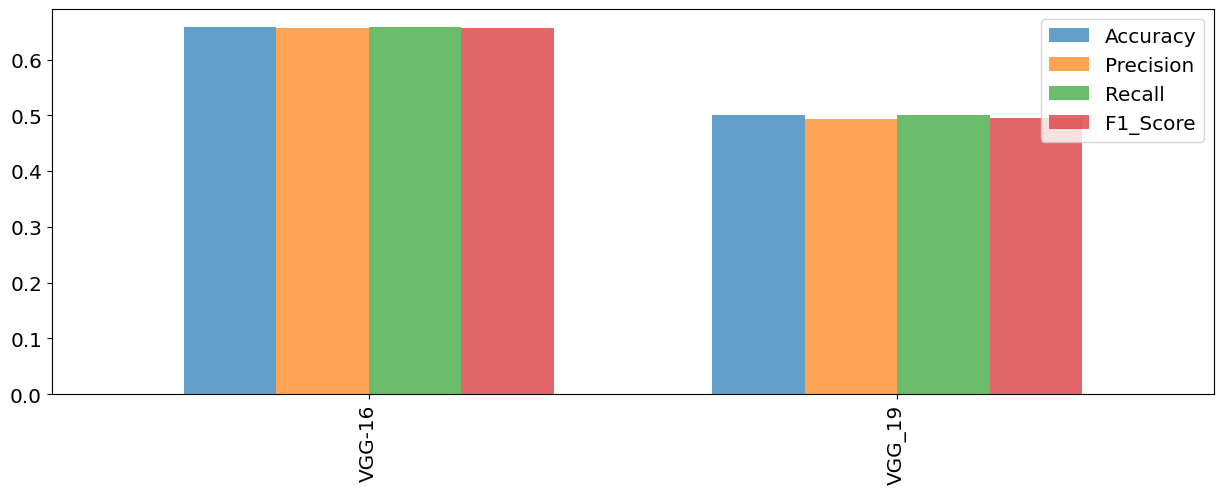

In [ ]:
ErrorMetrics_pd.plot.bar(width=0.7, alpha=0.7)

<html> <h2 style="font-style:bold; color:red;"> Lab Logbook requirements </h2> </html>

### 1. Plot graphs for Accuracy and Loss Function for VGG16 and VGG19 (4 graphs in total).
### 2. Based on this analysis, determine the optimal number of epochs for training your VGG16 model.

### 3. Add the final Performance Table

### 4. Plot the performance comparing histogram of VGG16 and VGG19